In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
df = pd.read_csv("spam.csv",encoding='ISO-8859-1')

In [3]:
df.head()

,v1,v2,Unnamed: 2,Unnamed: 3,Unnamed: 4
0,ham,"Go until jurong point, crazy.. Available only ...",NaN,NaN,NaN
1,ham,Ok lar... Joking wif u oni...,NaN,NaN,NaN
2,spam,Free entry in 2 a wkly comp to win FA Cup fina...,NaN,NaN,NaN
3,ham,U dun say so early hor... U c already then say...,NaN,NaN,NaN
4,ham,"Nah I don't think he goes to usf, he lives aro...",NaN,NaN,NaN


In [4]:
df.shape

(5572, 5)

Stages of the Project
1. Data Cleaning
2. EDA (Exploratory Data Analysis)
3. Text Preprocessing
4. Model building
5. Evaluation
6. Improvements
7. Website create
8. Deployment

## 1. Data Cleaning

In [5]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5572 entries, 0 to 5571
Data columns (total 5 columns):
 #   Column      Non-Null Count  Dtype 
---  ------      --------------  ----- 
 0   v1          5572 non-null   object
 1   v2          5572 non-null   object
 2   Unnamed: 2  50 non-null     object
 3   Unnamed: 3  12 non-null     object
 4   Unnamed: 4  6 non-null      object
dtypes: object(5)
memory usage: 217.8+ KB


Most of the values are missing in column 3, 4, 5. So we have to drop those columns

In [6]:
#drop last 3 columns
df.drop(columns=['Unnamed: 2','Unnamed: 3','Unnamed: 4'], inplace=True)

In [7]:
df.head()

,v1,v2
0,ham,"Go until jurong point, crazy.. Available only ..."
1,ham,Ok lar... Joking wif u oni...
2,spam,Free entry in 2 a wkly comp to win FA Cup fina...
3,ham,U dun say so early hor... U c already then say...
4,ham,"Nah I don't think he goes to usf, he lives aro..."


In [8]:
df.sample(5)

,v1,v2
2639,ham,Why she wants to talk to me
88,ham,I'm really not up to it still tonight babe
4338,ham,Just got outta class gonna go gym.
5114,ham,Argh why the fuck is nobody in town ;_;
2327,spam,URGENT! Your mobile number *************** WON...


In [9]:
#Renaming the Columns
df.rename(columns = {'v1':'target','v2':'text'},inplace=True)

In [10]:
df.sample(5)

,target,text
141,ham,"Sir, Waiting for your mail."
5231,ham,I realise you are a busy guy and i'm trying no...
1222,ham,Teach me apps da. When you come to college.
2507,ham,Yup...
5373,ham,"K I'll head out in a few mins, see you there"


In [11]:
from sklearn.preprocessing import LabelEncoder
encoder = LabelEncoder()

In [12]:
#labelEncoder is used to labeling the each unique categories

In [13]:
df['target']

0        ham
1        ham
2       spam
3        ham
4        ham
        ... 
5567    spam
5568     ham
5569     ham
5570     ham
5571     ham
Name: target, Length: 5572, dtype: object

In [14]:
df['target'] = encoder.fit_transform(df['target'])

In [15]:
df.sample(5)

,target,text
4210,0,Oi when you gonna ring
73,0,K..k:)where are you?how did you performed?
4784,1,Urgent -call 09066649731from Landline. Your co...
869,1,What do U want for Xmas? How about 100 free te...
4144,0,Lol I would but despite these cramps I like be...


In [16]:
# check the missing values
df.isnull().sum()

target    0
text      0
dtype: int64

In [17]:
# check the duplicate values
df.duplicated().sum()

403

In [18]:
# remove the duplicated values
df.drop_duplicates(keep='first',inplace=True)

In [19]:
df.duplicated().sum()

0

In [20]:
df.shape

(5169, 2)

## 2. EDA

In [21]:
df.head()

,target,text
0,0,"Go until jurong point, crazy.. Available only ..."
1,0,Ok lar... Joking wif u oni...
2,1,Free entry in 2 a wkly comp to win FA Cup fina...
3,0,U dun say so early hor... U c already then say...
4,0,"Nah I don't think he goes to usf, he lives aro..."


In [22]:
df['target'].value_counts()

0    4516
1     653
Name: target, dtype: int64

# Visualize the data

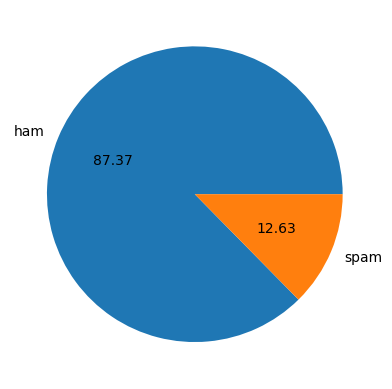

In [23]:
#pie plot
plt.pie(df['target'].value_counts(), labels = ['ham','spam'], autopct = "%0.2f")
plt.show()

In [24]:
#Clearing shows that data is imbalance

In [25]:
import nltk

In [26]:
#nltk.download('punkt')

In [27]:
#finding the no of characters
df['num_characters'] = df['text'].apply(len)

In [28]:
df.head()

,target,text,num_characters
0,0,"Go until jurong point, crazy.. Available only ...",111
1,0,Ok lar... Joking wif u oni...,29
2,1,Free entry in 2 a wkly comp to win FA Cup fina...,155
3,0,U dun say so early hor... U c already then say...,49
4,0,"Nah I don't think he goes to usf, he lives aro...",61


In [29]:
#finding the num of words
df['num_words'] = df['text'].apply(lambda x:len(nltk.word_tokenize(x)))

In [30]:
df.head()

,target,text,num_characters,num_words
0,0,"Go until jurong point, crazy.. Available only ...",111,24
1,0,Ok lar... Joking wif u oni...,29,8
2,1,Free entry in 2 a wkly comp to win FA Cup fina...,155,37
3,0,U dun say so early hor... U c already then say...,49,13
4,0,"Nah I don't think he goes to usf, he lives aro...",61,15


In [31]:
#finding the num of sentences
df['num_sentences'] = df['text'].apply(lambda x:len(nltk.sent_tokenize(x)))

In [32]:
df.head()

,target,text,num_characters,num_words,num_sentences
0,0,"Go until jurong point, crazy.. Available only ...",111,24,2
1,0,Ok lar... Joking wif u oni...,29,8,2
2,1,Free entry in 2 a wkly comp to win FA Cup fina...,155,37,2
3,0,U dun say so early hor... U c already then say...,49,13,1
4,0,"Nah I don't think he goes to usf, he lives aro...",61,15,1


In [33]:
df[['num_characters', 'num_words', 'num_sentences']].describe()

,num_characters,num_words,num_sentences
count,5169.000000,5169.000000,5169.000000
mean,78.977945,18.453279,1.947185
std,58.236293,13.324793,1.362406
min,2.000000,1.000000,1.000000
25%,36.000000,9.000000,1.000000
50%,60.000000,15.000000,1.000000
75%,117.000000,26.000000,2.000000
max,910.000000,220.000000,28.000000


⬆️we can analyze that, on an average no of characters have 78 following a words and sentences

In [34]:
df[df['target'] == 0][['num_characters', 'num_words', 'num_sentences']].describe()

,num_characters,num_words,num_sentences
count,4516.000000,4516.000000,4516.000000
mean,70.459256,17.120903,1.799601
std,56.358207,13.493725,1.278465
min,2.000000,1.000000,1.000000
25%,34.000000,8.000000,1.000000
50%,52.000000,13.000000,1.000000
75%,90.000000,22.000000,2.000000
max,910.000000,220.000000,28.000000


⬆️here we are analyzing the harm, on an average no of characters have 70 following a words and sentences

In [35]:
df[df['target'] == 1][['num_characters', 'num_words', 'num_sentences']].describe()

,num_characters,num_words,num_sentences
count,653.000000,653.000000,653.000000
mean,137.891271,27.667688,2.967841
std,30.137753,7.008418,1.483201
min,13.000000,2.000000,1.000000
25%,132.000000,25.000000,2.000000
50%,149.000000,29.000000,3.000000
75%,157.000000,32.000000,4.000000
max,224.000000,46.000000,8.000000


where as in spam data, the average character count has 137

<Axes: xlabel='num_characters', ylabel='Count'>

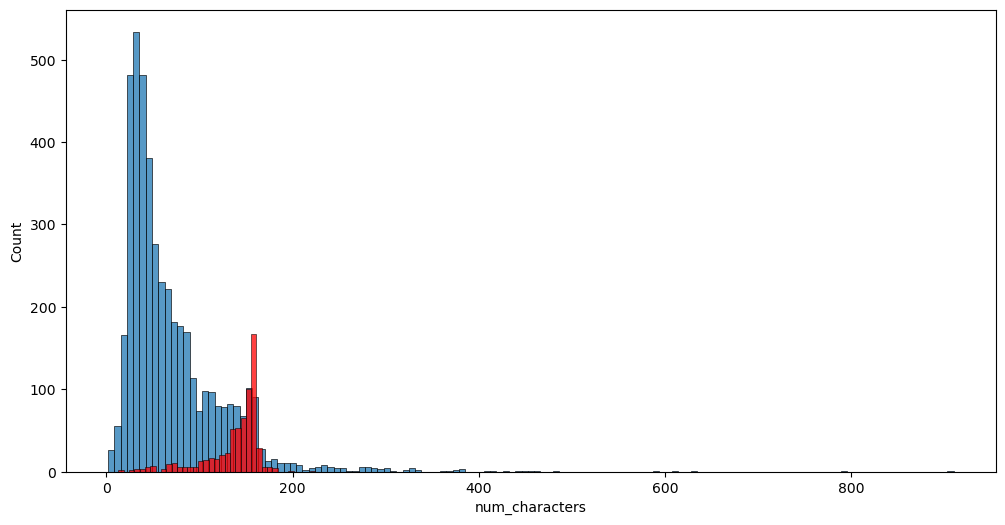

In [36]:
plt.figure(figsize=(12,6))
sns.histplot(df[df['target'] == 0]['num_characters'])
sns.histplot(df[df['target'] == 1]['num_characters'], color='red')

<Axes: xlabel='num_words', ylabel='Count'>

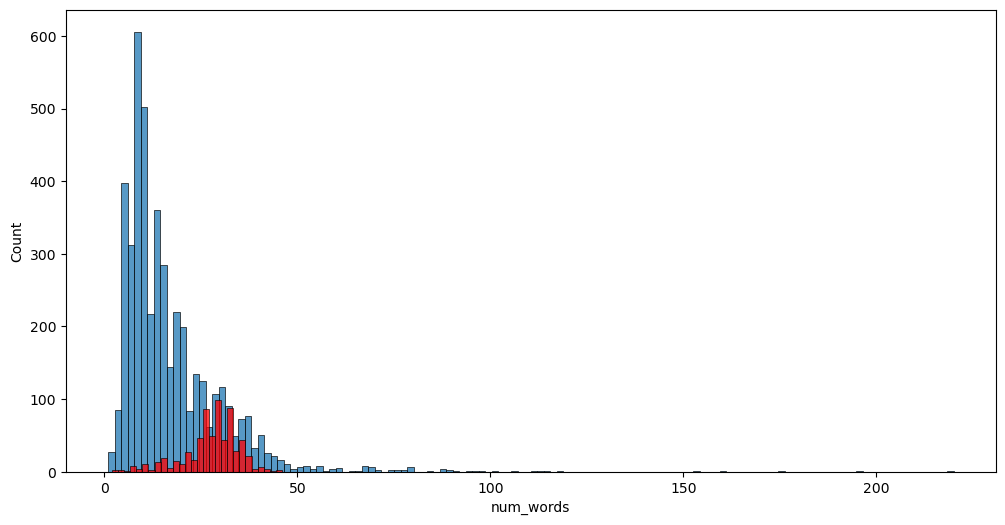

In [37]:
plt.figure(figsize=(12,6))
sns.histplot(df[df['target'] == 0]['num_words'])
sns.histplot(df[df['target'] == 1]['num_words'], color='red')

<Axes: xlabel='num_sentences', ylabel='Count'>

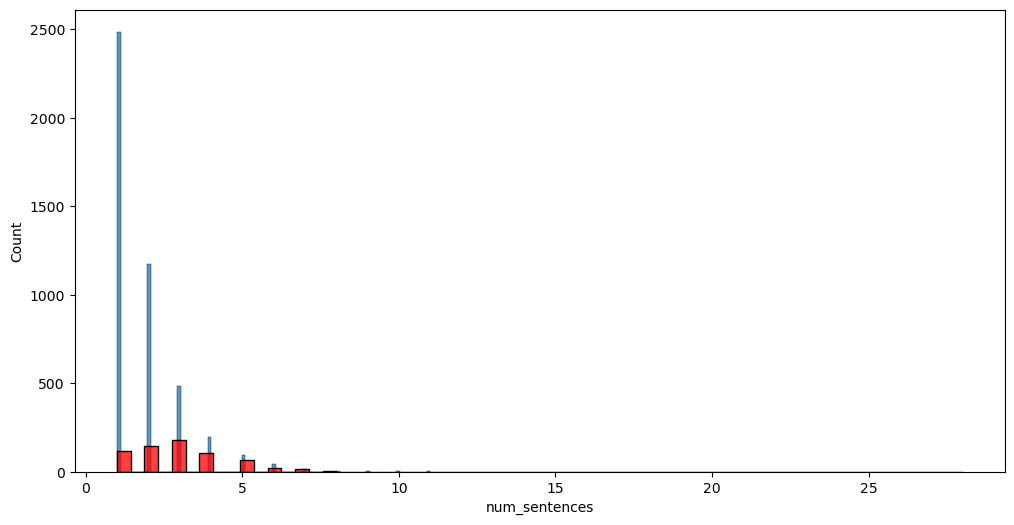

In [38]:
plt.figure(figsize=(12,6))
sns.histplot(df[df['target'] == 0]['num_sentences'])
sns.histplot(df[df['target'] == 1]['num_sentences'], color='red')

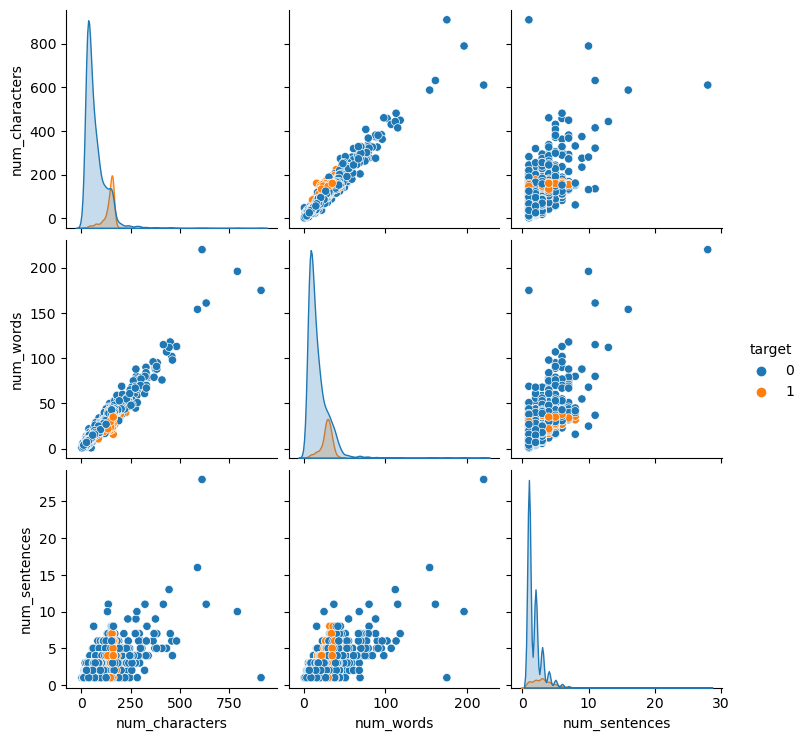

In [39]:
#find the correlation between the features

sns.pairplot(df, hue='target')

C:\Users\TVV\AppData\Local\Temp\ipykernel_1080\4277794465.py:1: FutureWarning: The default value of numeric_only in DataFrame.corr is deprecated. In a future version, it will default to False. Select only valid columns or specify the value of numeric_only to silence this warning.
  sns.heatmap(df.corr(),annot=True)


<Axes: >

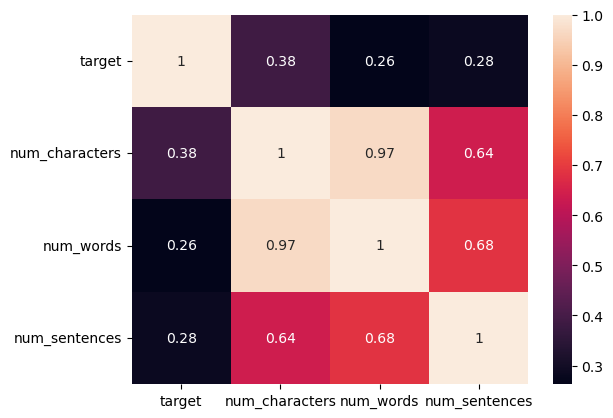

In [40]:
sns.heatmap(df.corr(),annot=True)

# 3. Data Preprocessing


- Lower case
- Tokenization
- Removing special characters
- Removing stop words and punctuation
- Stemming

In [41]:
def transform_text(text):
    text = text.lower()
    #Tokenization
    text = nltk.word_tokenize(text)
    #Removing special characters
    res = []
    for i in text:
        if i.isalnum():
            res.append(i)
    #Removing stop words and punctuation
    out = []
    for i in res:
        if i not in stopwords.words('english') and i not in string.punctuation:
            out.append(i)
    #Stemming
    text = out[:]
    out.clear()
    for i in text:
        out.append(ps.stem(i))
    return " ".join(out)
    

In [42]:
#Removing stop words 
#nltk.download("stopwords")
from nltk.corpus import stopwords
stopwords.words('english')


['i',
 'me',
 'my',
 'myself',
 'we',
 'our',
 'ours',
 'ourselves',
 'you',
 "you're",
 "you've",
 "you'll",
 "you'd",
 'your',
 'yours',
 'yourself',
 'yourselves',
 'he',
 'him',
 'his',
 'himself',
 'she',
 "she's",
 'her',
 'hers',
 'herself',
 'it',
 "it's",
 'its',
 'itself',
 'they',
 'them',
 'their',
 'theirs',
 'themselves',
 'what',
 'which',
 'who',
 'whom',
 'this',
 'that',
 "that'll",
 'these',
 'those',
 'am',
 'is',
 'are',
 'was',
 'were',
 'be',
 'been',
 'being',
 'have',
 'has',
 'had',
 'having',
 'do',
 'does',
 'did',
 'doing',
 'a',
 'an',
 'the',
 'and',
 'but',
 'if',
 'or',
 'because',
 'as',
 'until',
 'while',
 'of',
 'at',
 'by',
 'for',
 'with',
 'about',
 'against',
 'between',
 'into',
 'through',
 'during',
 'before',
 'after',
 'above',
 'below',
 'to',
 'from',
 'up',
 'down',
 'in',
 'out',
 'on',
 'off',
 'over',
 'under',
 'again',
 'further',
 'then',
 'once',
 'here',
 'there',
 'when',
 'where',
 'why',
 'how',
 'all',
 'any',
 'both',
 'each

In [43]:
#punctuation
import string
string.punctuation

'!"#$%&\'()*+,-./:;<=>?@[\\]^_`{|}~'

In [44]:
#Stemming
from nltk.stem.porter import PorterStemmer
ps = PorterStemmer()
ps.stem('playing')

'play'

In [45]:
df['text'][1400]

'No, I decided that only people who care about stuff vote and caring about stuff is for losers'

In [46]:
transform_text(df['text'][1230])

'want send someth sell fast lt gt k easi money'

In [47]:
#adding the transform_text to the dataframe
df['transformed_text'] = df['text'].apply(transform_text)

In [48]:
df.head()

,target,text,num_characters,num_words,num_sentences,transformed_text
0,0,"Go until jurong point, crazy.. Available only ...",111,24,2,go jurong point crazi avail bugi n great world...
1,0,Ok lar... Joking wif u oni...,29,8,2,ok lar joke wif u oni
2,1,Free entry in 2 a wkly comp to win FA Cup fina...,155,37,2,free entri 2 wkli comp win fa cup final tkt 21...
3,0,U dun say so early hor... U c already then say...,49,13,1,u dun say earli hor u c alreadi say
4,0,"Nah I don't think he goes to usf, he lives aro...",61,15,1,nah think goe usf live around though


In [49]:
#!pip install wordcloud

In [50]:
from wordcloud import WordCloud
wc = WordCloud(width=500, height= 500, min_font_size = 10, background_color='white')

In [51]:
spam_wc = wc.generate(df[df['target']==1]['transformed_text'].str.cat(sep=" "))

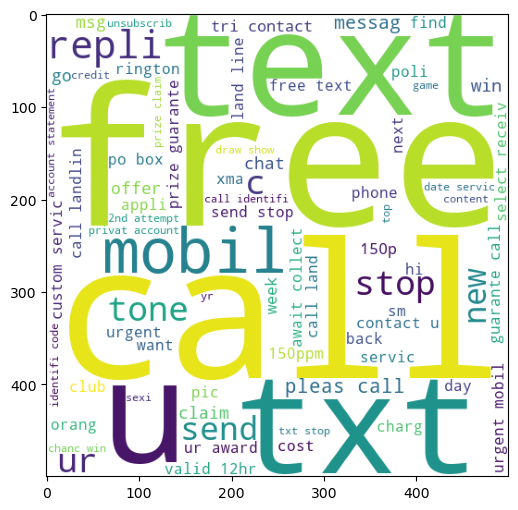

In [52]:
plt.figure(figsize=(15,6))
plt.imshow(spam_wc)

In [53]:
ham_wc = wc.generate(df[df['target']==0]['transformed_text'].str.cat(sep=" "))

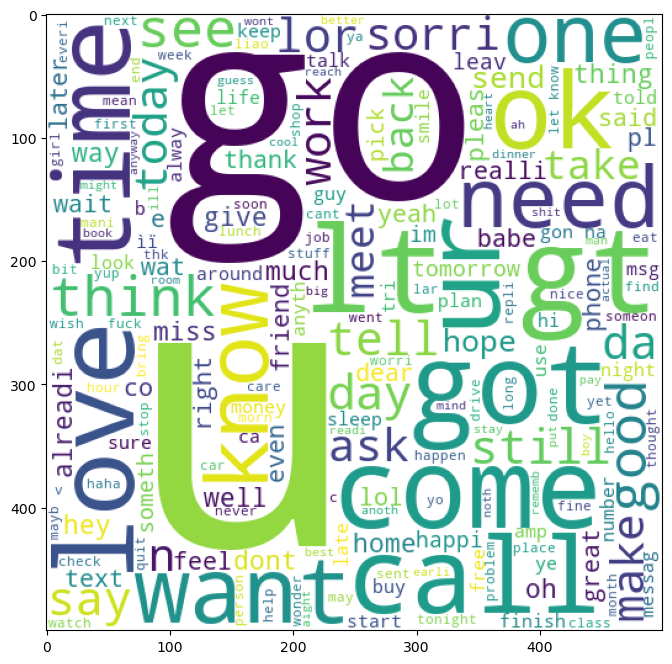

In [54]:
plt.figure(figsize=(15,8))
plt.imshow(ham_wc)

In [55]:
df.head()

,target,text,num_characters,num_words,num_sentences,transformed_text
0,0,"Go until jurong point, crazy.. Available only ...",111,24,2,go jurong point crazi avail bugi n great world...
1,0,Ok lar... Joking wif u oni...,29,8,2,ok lar joke wif u oni
2,1,Free entry in 2 a wkly comp to win FA Cup fina...,155,37,2,free entri 2 wkli comp win fa cup final tkt 21...
3,0,U dun say so early hor... U c already then say...,49,13,1,u dun say earli hor u c alreadi say
4,0,"Nah I don't think he goes to usf, he lives aro...",61,15,1,nah think goe usf live around though


#finding the top 30 words in ham and spam data


In [56]:
df[df['target'] == 1]['transformed_text'].tolist()
#this is a list of sentences

['free entri 2 wkli comp win fa cup final tkt 21st may text fa 87121 receiv entri question std txt rate c appli 08452810075over18',
 'freemsg hey darl 3 week word back like fun still tb ok xxx std chg send rcv',
 'winner valu network custom select receivea prize reward claim call claim code kl341 valid 12 hour',
 'mobil 11 month u r entitl updat latest colour mobil camera free call mobil updat co free 08002986030',
 'six chanc win cash 100 pound txt csh11 send cost 6day tsandc appli repli hl 4 info',
 'urgent 1 week free membership prize jackpot txt word claim 81010 c lccltd pobox 4403ldnw1a7rw18',
 'xxxmobilemovieclub use credit click wap link next txt messag click http',
 'england v macedonia dont miss news txt ur nation team 87077 eg england 87077 tri wale scotland poboxox36504w45wq',
 'thank subscript rington uk mobil charg pleas confirm repli ye repli charg',
 '07732584351 rodger burn msg tri call repli sm free nokia mobil free camcord pleas call 08000930705 deliveri tomorrow',
 '

In [57]:
spam_corpus = []
for msg in df[df['target'] == 1]['transformed_text'].tolist():
    for word in msg.split():
        spam_corpus.append(word)

In [58]:
spam_corpus

['free',
 'entri',
 '2',
 'wkli',
 'comp',
 'win',
 'fa',
 'cup',
 'final',
 'tkt',
 '21st',
 'may',
 'text',
 'fa',
 '87121',
 'receiv',
 'entri',
 'question',
 'std',
 'txt',
 'rate',
 'c',
 'appli',
 '08452810075over18',
 'freemsg',
 'hey',
 'darl',
 '3',
 'week',
 'word',
 'back',
 'like',
 'fun',
 'still',
 'tb',
 'ok',
 'xxx',
 'std',
 'chg',
 'send',
 'rcv',
 'winner',
 'valu',
 'network',
 'custom',
 'select',
 'receivea',
 'prize',
 'reward',
 'claim',
 'call',
 'claim',
 'code',
 'kl341',
 'valid',
 '12',
 'hour',
 'mobil',
 '11',
 'month',
 'u',
 'r',
 'entitl',
 'updat',
 'latest',
 'colour',
 'mobil',
 'camera',
 'free',
 'call',
 'mobil',
 'updat',
 'co',
 'free',
 '08002986030',
 'six',
 'chanc',
 'win',
 'cash',
 '100',
 'pound',
 'txt',
 'csh11',
 'send',
 'cost',
 '6day',
 'tsandc',
 'appli',
 'repli',
 'hl',
 '4',
 'info',
 'urgent',
 '1',
 'week',
 'free',
 'membership',
 'prize',
 'jackpot',
 'txt',
 'word',
 'claim',
 '81010',
 'c',
 'lccltd',
 'pobox',
 '4403ldnw

In [59]:
len(spam_corpus)

9939

In [60]:
from collections import Counter
df_spam=pd.DataFrame(Counter(spam_corpus).most_common(30))


#sns.barplot(x=pd.DataFrame(Counter(spam_corpus).most_common(30))[0],y=pd.DataFrame(Counter(spam_corpus).most_common(30))[1])

In [61]:
df_spam

,0,1
0,call,320
1,free,191
2,2,155
3,txt,141
4,text,122
5,u,119
6,ur,119
7,mobil,114
8,stop,104
9,repli,103


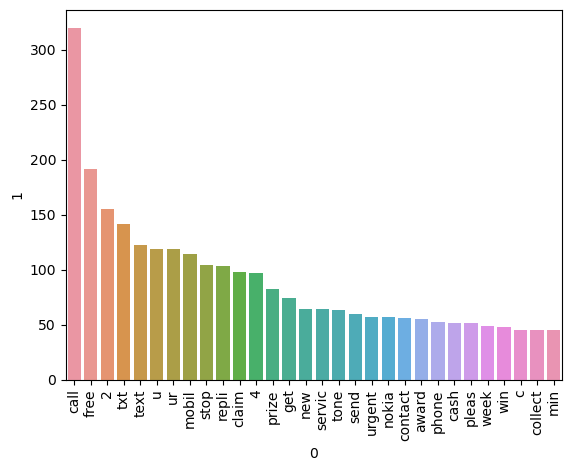

In [62]:
sns.barplot(x = df_spam[0],y = df_spam[1])
plt.xticks(rotation='vertical')
plt.show()

In [63]:
ham_corpus = []
for msg in df[df['target'] == 0]['transformed_text'].tolist():
    for word in msg.split():
        ham_corpus.append(word)

In [64]:
ham_corpus

['go',
 'jurong',
 'point',
 'crazi',
 'avail',
 'bugi',
 'n',
 'great',
 'world',
 'la',
 'e',
 'buffet',
 'cine',
 'got',
 'amor',
 'wat',
 'ok',
 'lar',
 'joke',
 'wif',
 'u',
 'oni',
 'u',
 'dun',
 'say',
 'earli',
 'hor',
 'u',
 'c',
 'alreadi',
 'say',
 'nah',
 'think',
 'goe',
 'usf',
 'live',
 'around',
 'though',
 'even',
 'brother',
 'like',
 'speak',
 'treat',
 'like',
 'aid',
 'patent',
 'per',
 'request',
 'mell',
 'oru',
 'minnaminungint',
 'nurungu',
 'vettam',
 'set',
 'callertun',
 'caller',
 'press',
 '9',
 'copi',
 'friend',
 'callertun',
 'gon',
 'na',
 'home',
 'soon',
 'want',
 'talk',
 'stuff',
 'anymor',
 'tonight',
 'k',
 'cri',
 'enough',
 'today',
 'search',
 'right',
 'word',
 'thank',
 'breather',
 'promis',
 'wont',
 'take',
 'help',
 'grant',
 'fulfil',
 'promis',
 'wonder',
 'bless',
 'time',
 'date',
 'sunday',
 'oh',
 'k',
 'watch',
 'eh',
 'u',
 'rememb',
 '2',
 'spell',
 'name',
 'ye',
 'v',
 'naughti',
 'make',
 'v',
 'wet',
 'fine',
 'thatåõ',
 'wa

In [65]:
len(ham_corpus)

35394

In [66]:
Counter(ham_corpus)

Counter({'go': 404,
         'jurong': 1,
         'point': 17,
         'crazi': 10,
         'avail': 13,
         'bugi': 7,
         'n': 120,
         'great': 97,
         'world': 28,
         'la': 7,
         'e': 77,
         'buffet': 2,
         'cine': 7,
         'got': 236,
         'amor': 1,
         'wat': 108,
         'ok': 217,
         'lar': 38,
         'joke': 14,
         'wif': 27,
         'u': 883,
         'oni': 4,
         'dun': 55,
         'say': 127,
         'earli': 33,
         'hor': 2,
         'c': 57,
         'alreadi': 90,
         'nah': 10,
         'think': 149,
         'goe': 26,
         'usf': 10,
         'live': 25,
         'around': 59,
         'though': 26,
         'even': 77,
         'brother': 17,
         'like': 234,
         'speak': 24,
         'treat': 19,
         'aid': 2,
         'patent': 1,
         'per': 9,
         'request': 6,
         'mell': 1,
         'oru': 2,
         'minnaminungint': 1,
         'nur

In [67]:
df_ham = pd.DataFrame(Counter(ham_corpus).most_common(30))
# df_ham = pd.DataFrame(Counter(ham_corpus)) gets an error


In [68]:
df_ham

,0,1
0,u,883
1,go,404
2,get,349
3,gt,288
4,lt,287
5,2,284
6,come,275
7,got,236
8,know,236
9,like,234


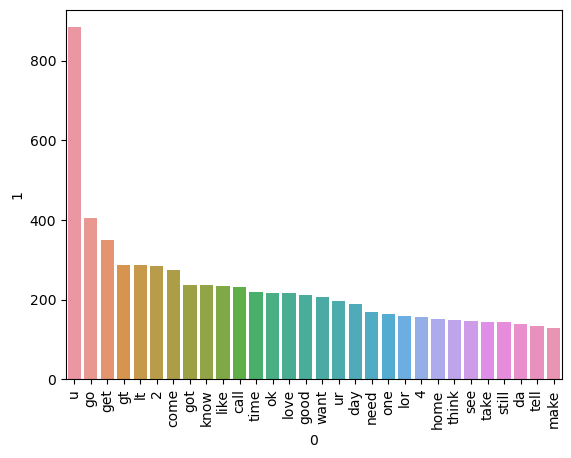

In [69]:
sns.barplot(x = df_ham[0],y = df_ham[1])
plt.xticks(rotation='vertical')
plt.show()

In [70]:
df.head()

,target,text,num_characters,num_words,num_sentences,transformed_text
0,0,"Go until jurong point, crazy.. Available only ...",111,24,2,go jurong point crazi avail bugi n great world...
1,0,Ok lar... Joking wif u oni...,29,8,2,ok lar joke wif u oni
2,1,Free entry in 2 a wkly comp to win FA Cup fina...,155,37,2,free entri 2 wkli comp win fa cup final tkt 21...
3,0,U dun say so early hor... U c already then say...,49,13,1,u dun say earli hor u c alreadi say
4,0,"Nah I don't think he goes to usf, he lives aro...",61,15,1,nah think goe usf live around though


# Model Building

Using navie bayes classifier. 
- This algorithm only takes an input as numeric , here our input is transformed_text , so to convert that categorical data to numeric use vectorization. 
- vectorization:- Converting text to vectors
- Bag of words:- finding the frequently occured words


CountVectorizer means bagofwords,
tfid -- vecotrizer

In [71]:
from sklearn.feature_extraction.text import CountVectorizer,TfidfVectorizer
cv = CountVectorizer()
tfidf = TfidfVectorizer()

1. Using CountVectorizer

In [72]:
X = cv.fit_transform(df['transformed_text']).toarray()

In [73]:
X.shape    #(sms,words)

(5169, 6708)

In [74]:
y = df['target'].values

In [75]:
y

array([0, 0, 1, ..., 0, 0, 0])

In [76]:
from sklearn.model_selection import train_test_split

In [77]:
X_train , X_test , y_train , y_test = train_test_split(X,y,test_size=0.2,random_state=2)

In [78]:
from sklearn.naive_bayes import GaussianNB, MultinomialNB, BernoulliNB
from sklearn.metrics import accuracy_score, confusion_matrix,precision_score

In [79]:
gnb = GaussianNB()
mnb = MultinomialNB()
bnb = BernoulliNB()

Because of the imbance data accuracy_score doesn't matter much, precision_score has more value. 

In [80]:
gnb.fit(X_train,y_train)
y_pred1 = gnb.predict(X_test)
print(accuracy_score(y_test,y_pred1))
print(confusion_matrix(y_test,y_pred1))
print(precision_score(y_test,y_pred1))

0.8800773694390716
[[792 104]
 [ 20 118]]
0.5315315315315315


In [81]:
mnb.fit(X_train,y_train)
y_pred2 = mnb.predict(X_test)
print(accuracy_score(y_test,y_pred2))
print(confusion_matrix(y_test,y_pred2))
print(precision_score(y_test,y_pred2))

0.9642166344294004
[[871  25]
 [ 12 126]]
0.8344370860927153


In [82]:
bnb.fit(X_train,y_train)
y_pred3 = bnb.predict(X_test)
print(accuracy_score(y_test,y_pred3))
print(confusion_matrix(y_test,y_pred3))
print(precision_score(y_test,y_pred3))

0.9700193423597679
[[893   3]
 [ 28 110]]
0.9734513274336283


Comparing to above 3 algorithms, bnb preforms well.

2. Usind tfidf Vectorizer

In [83]:
X1 = tfidf.fit_transform(df['transformed_text']).toarray()

In [84]:
X1.shape

(5169, 6708)

In [85]:
y1 = df['target'].values

In [86]:
X1_train , X1_test, y1_train , y1_test = train_test_split(X1,y1,test_size = 0.2, random_state = 2)

In [87]:
gnb.fit(X1_train,y1_train)
y1_pred1 = gnb.predict(X1_test)
print(accuracy_score(y1_test,y1_pred1))
print(confusion_matrix(y1_test,y1_pred1))
print(precision_score(y1_test,y1_pred1))

0.8762088974854932
[[793 103]
 [ 25 113]]
0.5231481481481481


In [88]:
mnb.fit(X1_train,y1_train)
y1_pred2 = mnb.predict(X1_test)
print(accuracy_score(y1_test,y1_pred2))
print(confusion_matrix(y1_test,y1_pred2))
print(precision_score(y1_test,y1_pred2))

0.9593810444874274
[[896   0]
 [ 42  96]]
1.0


In [89]:
bnb.fit(X1_train,y1_train)
y1_pred3 = bnb.predict(X1_test)
print(accuracy_score(y1_test,y1_pred3))
print(confusion_matrix(y1_test,y1_pred3))
print(precision_score(y1_test,y1_pred3))

0.9700193423597679
[[893   3]
 [ 28 110]]
0.9734513274336283


Here, precision_score matters high,so we can go with multinomial with tfidfVectorization

#tfidf --> MNB

# Compare other algorithms with MNB

In [90]:
#!pip install xgboost

In [91]:
from sklearn.linear_model import LogisticRegression
from sklearn.svm import SVC
from sklearn.naive_bayes import MultinomialNB
from sklearn.tree import DecisionTreeClassifier
from sklearn.neighbors import KNeighborsClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.ensemble import AdaBoostClassifier
from sklearn.ensemble import BaggingClassifier
from sklearn.ensemble import ExtraTreesClassifier
from sklearn.ensemble import GradientBoostingClassifier
from xgboost import XGBClassifier

 Here, we are using tfidf vectorization as X1,y1

In [92]:
svc = SVC(kernel = 'sigmoid', gamma = 1.0)
knc = KNeighborsClassifier()
mnb = MultinomialNB()
dtc = DecisionTreeClassifier(max_depth=5)
lrc = LogisticRegression(solver='liblinear',penalty = 'l1')
rfc = RandomForestClassifier(n_estimators=50,random_state=2)
abc = AdaBoostClassifier(n_estimators=50, random_state=2)
bc = BaggingClassifier(n_estimators=50, random_state=2)
etc = ExtraTreesClassifier(n_estimators=50, random_state=20)
gbdt = GradientBoostingClassifier(n_estimators=50, random_state=2)
xgb = XGBClassifier(n_estimators=50,random_state = 2)


In [93]:
clfs = {
    'SVC' : svc,
    'KN' : knc,
    'NB' : mnb,
    'DT' : dtc,
    'LR' : lrc,
    'RF' : rfc,
    'AdaBoost' : abc,
    'BgC': bc,
    'ETC' : etc,
    'GBDT' : gbdt,
    'XGB' : xgb
}

In [94]:
def train_classifier(clf, X_train, y_train, X_test, y_test):
    clf.fit(X_train,y_train)
    y_pred = clf.predict(X_test)
    accuracy = accuracy_score(y_test,y_pred)
    precision = precision_score(y_test,y_pred)
    return accuracy,precision

In [95]:
print(train_classifier(svc,X1_train,y1_train,X1_test,y1_test))

(0.9729206963249516, 0.9741379310344828)


In [96]:
accuracy_scores = []
precision_scores = []

for name,clf in clfs.items():
    current_accuracy, current_precision = train_classifier(clf,X1_train,y1_train,X1_test,y1_test)
    print("For ", name)
    print("Accuracy - ", current_accuracy)
    print("Precision - ",current_precision)
    accuracy_scores.append(current_accuracy)
    precision_scores.append(current_precision)

For  SVC
Accuracy -  0.9729206963249516
Precision -  0.9741379310344828
For  KN
Accuracy -  0.9003868471953579
Precision -  1.0
For  NB
Accuracy -  0.9593810444874274
Precision -  1.0
For  DT
Accuracy -  0.9361702127659575
Precision -  0.8461538461538461
For  LR
Accuracy -  0.9516441005802708
Precision -  0.94
For  RF
Accuracy -  0.9738878143133463
Precision -  1.0
For  AdaBoost
Accuracy -  0.9613152804642167
Precision -  0.9454545454545454
For  BgC
Accuracy -  0.9584139264990329
Precision -  0.8625954198473282
For  ETC
Accuracy -  0.9758220502901354
Precision -  0.9829059829059829
For  GBDT
Accuracy -  0.9526112185686654
Precision -  0.9238095238095239
For  XGB
Accuracy -  0.9729206963249516
Precision -  0.9365079365079365


#sort according to Accuracy values

In [97]:
performance_df = pd.DataFrame({'Algorithm' : clfs.keys(), 'Accuracy' : accuracy_scores, 'Precision' : precision_scores }).sort_values('Accuracy',ascending=False)

In [98]:
performance_df

,Algorithm,Accuracy,Precision
8,ETC,0.975822,0.982906
5,RF,0.973888,1.000000
0,SVC,0.972921,0.974138
10,XGB,0.972921,0.936508
6,AdaBoost,0.961315,0.945455
2,NB,0.959381,1.000000
7,BgC,0.958414,0.862595
9,GBDT,0.952611,0.923810
4,LR,0.951644,0.940000
3,DT,0.936170,0.846154


#sort with precision

In [99]:
p_performance_df=performance_df.sort_values('Precision',ascending=False)

In [113]:
p_performance_dfance_dfance_dfance_df

,Algorithm,Accuracy,Precision
5,RF,0.973888,1.000000
2,NB,0.959381,1.000000
1,KN,0.900387,1.000000
8,ETC,0.975822,0.982906
0,SVC,0.972921,0.974138
6,AdaBoost,0.961315,0.945455
4,LR,0.951644,0.940000
10,XGB,0.972921,0.936508
9,GBDT,0.952611,0.923810
7,BgC,0.958414,0.862595


In [100]:
performance_df1 = pd.melt(performance_df, id_vars = 'Algorithm')

In [101]:
performance_df1

,Algorithm,variable,value
0,ETC,Accuracy,0.975822
1,RF,Accuracy,0.973888
2,SVC,Accuracy,0.972921
3,XGB,Accuracy,0.972921
4,AdaBoost,Accuracy,0.961315
5,NB,Accuracy,0.959381
6,BgC,Accuracy,0.958414
7,GBDT,Accuracy,0.952611
8,LR,Accuracy,0.951644
9,DT,Accuracy,0.936170


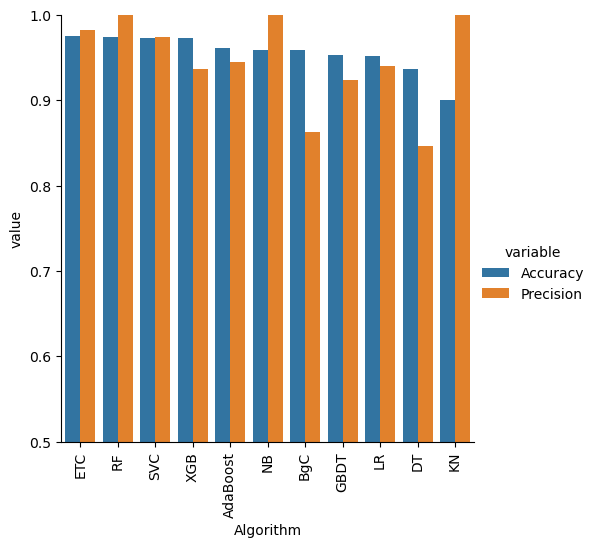

In [102]:
#plotting a graph of 
sns.catplot(x = 'Algorithm', y = 'value', hue = 'variable', data = performance_df1, kind = 'bar', height = 5)
plt.ylim(0.5,1.0)
plt.xticks(rotation='vertical')
plt.show()

# Model Improvement

#1. Change the max_features parameter of Tfidf
(There is a one hidden feature in Tfidf Vectorization.)Basically what it is, considering some limited words(unique or most imp) to Vectorize. So that it may improve the model

In [103]:
tfidf1 = TfidfVectorizer(max_features=3000)

In [104]:
X1 = tfidf1.fit_transform(df['transformed_text']).toarray()
X1.shape
y1 = df['target'].values
X1_train , X1_test, y1_train , y1_test = train_test_split(X1,y1,test_size = 0.2, random_state = 2)


In [105]:
gnb.fit(X1_train,y1_train)
y1_pred1 = gnb.predict(X1_test)
print(accuracy_score(y1_test,y1_pred1))
print(confusion_matrix(y1_test,y1_pred1))
print(precision_score(y1_test,y1_pred1))


0.8694390715667312
[[788 108]
 [ 27 111]]
0.5068493150684932


In [106]:

mnb.fit(X1_train,y1_train)
y1_pred2 = mnb.predict(X1_test)
print(accuracy_score(y1_test,y1_pred2))
print(confusion_matrix(y1_test,y1_pred2))
print(precision_score(y1_test,y1_pred2))


0.9709864603481625
[[896   0]
 [ 30 108]]
1.0


In [107]:
bnb.fit(X1_train,y1_train)
y1_pred3 = bnb.predict(X1_test)
print(accuracy_score(y1_test,y1_pred3))
print(confusion_matrix(y1_test,y1_pred3))
print(precision_score(y1_test,y1_pred3))

0.9835589941972921
[[895   1]
 [ 16 122]]
0.991869918699187


In [108]:
accuracy_scores = []
precision_scores = []

for name,clf in clfs.items():
    current_accuracy, current_precision = train_classifier(clf,X1_train,y1_train,X1_test,y1_test)
    print("For ", name)
    print("Accuracy - ", current_accuracy)
    print("Precision - ",current_precision)
    accuracy_scores.append(current_accuracy)
    precision_scores.append(current_precision)

For  SVC
Accuracy -  0.9758220502901354
Precision -  0.9747899159663865
For  KN
Accuracy -  0.9052224371373307
Precision -  1.0
For  NB
Accuracy -  0.9709864603481625
Precision -  1.0
For  DT
Accuracy -  0.9274661508704062
Precision -  0.8118811881188119
For  LR
Accuracy -  0.9584139264990329
Precision -  0.9702970297029703
For  RF
Accuracy -  0.9748549323017408
Precision -  0.9827586206896551
For  AdaBoost
Accuracy -  0.960348162475822
Precision -  0.9292035398230089
For  BgC
Accuracy -  0.9574468085106383
Precision -  0.8671875
For  ETC
Accuracy -  0.9796905222437138
Precision -  0.9834710743801653
For  GBDT
Accuracy -  0.9477756286266924
Precision -  0.92
For  XGB
Accuracy -  0.9661508704061895
Precision -  0.9256198347107438


In [109]:
temp_df = pd.DataFrame({'Algorithm' : clfs.keys(), 'Accuracy_max_ft_3000' : accuracy_scores, 'Precision_max_ft_3000' : precision_scores })

In [110]:
new_df = p_performance_df.merge(temp_df, on = 'Algorithm')

In [111]:
new_df

,Algorithm,Accuracy,Precision,Accuracy_max_ft_3000,Precision_max_ft_3000
0,RF,0.973888,1.000000,0.974855,0.982759
1,NB,0.959381,1.000000,0.970986,1.000000
2,KN,0.900387,1.000000,0.905222,1.000000
3,ETC,0.975822,0.982906,0.979691,0.983471
4,SVC,0.972921,0.974138,0.975822,0.974790
5,AdaBoost,0.961315,0.945455,0.960348,0.929204
6,LR,0.951644,0.940000,0.958414,0.970297
7,XGB,0.972921,0.936508,0.966151,0.925620
8,GBDT,0.952611,0.923810,0.947776,0.920000
9,BgC,0.958414,0.862595,0.957447,0.867188


# Performing Scaling to X improve the result

In [127]:
from sklearn.preprocessing import MinMaxScaler
scaler = MinMaxScaler()
X2 = scaler.fit_transform(X1)

In [128]:

y1 = df['target'].values
X1_train , X1_test, y1_train , y1_test = train_test_split(X2,y1,test_size = 0.2, random_state = 2)


In [129]:
X1.shape

(5169, 3000)

In [130]:
gnb.fit(X1_train,y1_train)
y1_pred1 = gnb.predict(X1_test)
print(accuracy_score(y1_test,y1_pred1))
print(confusion_matrix(y1_test,y1_pred1))
print(precision_score(y1_test,y1_pred1))


0.8723404255319149
[[782 114]
 [ 18 120]]
0.5128205128205128


In [131]:

mnb.fit(X1_train,y1_train)
y1_pred2 = mnb.predict(X1_test)
print(accuracy_score(y1_test,y1_pred2))
print(confusion_matrix(y1_test,y1_pred2))
print(precision_score(y1_test,y1_pred2))


0.9787234042553191
[[889   7]
 [ 15 123]]
0.9461538461538461


In [132]:
bnb.fit(X1_train,y1_train)
y1_pred3 = bnb.predict(X1_test)
print(accuracy_score(y1_test,y1_pred3))
print(confusion_matrix(y1_test,y1_pred3))
print(precision_score(y1_test,y1_pred3))

0.9835589941972921
[[895   1]
 [ 16 122]]
0.991869918699187


In [119]:
accuracy_scores = []
precision_scores = []

for name,clf in clfs.items():
    current_accuracy, current_precision = train_classifier(clf,X1_train,y1_train,X1_test,y1_test)
    print("For ", name)
    print("Accuracy - ", current_accuracy)
    print("Precision - ",current_precision)
    accuracy_scores.append(current_accuracy)
    precision_scores.append(current_precision)

For  SVC
Accuracy -  0.9661508704061895
Precision -  0.9256198347107438
For  KN
Accuracy -  0.9052224371373307
Precision -  0.9761904761904762
For  NB
Accuracy -  0.9787234042553191
Precision -  0.9461538461538461
For  DT
Accuracy -  0.9294003868471954
Precision -  0.8282828282828283
For  LR
Accuracy -  0.9671179883945842
Precision -  0.9642857142857143
For  RF
Accuracy -  0.9748549323017408
Precision -  0.9827586206896551
For  AdaBoost
Accuracy -  0.960348162475822
Precision -  0.9292035398230089
For  BgC
Accuracy -  0.9574468085106383
Precision -  0.8671875
For  ETC
Accuracy -  0.9796905222437138
Precision -  0.9834710743801653
For  GBDT
Accuracy -  0.9477756286266924
Precision -  0.92
For  XGB
Accuracy -  0.9661508704061895
Precision -  0.9256198347107438


In [120]:
temp_df = pd.DataFrame({'Algorithm' : clfs.keys(), 'Accuracy_scaling' : accuracy_scores, 'Precision_scaling' : precision_scores })

In [123]:
new_df_scaled = new_df.merge(temp_df, on = 'Algorithm')

In [125]:
new_df_scaled


,Algorithm,Accuracy,Precision,Accuracy_max_ft_3000,Precision_max_ft_3000,Accuracy_scaling,Precision_scaling
0,RF,0.973888,1.000000,0.974855,0.982759,0.974855,0.982759
1,NB,0.959381,1.000000,0.970986,1.000000,0.978723,0.946154
2,KN,0.900387,1.000000,0.905222,1.000000,0.905222,0.976190
3,ETC,0.975822,0.982906,0.979691,0.983471,0.979691,0.983471
4,SVC,0.972921,0.974138,0.975822,0.974790,0.966151,0.925620
5,AdaBoost,0.961315,0.945455,0.960348,0.929204,0.960348,0.929204
6,LR,0.951644,0.940000,0.958414,0.970297,0.967118,0.964286
7,XGB,0.972921,0.936508,0.966151,0.925620,0.966151,0.925620
8,GBDT,0.952611,0.923810,0.947776,0.920000,0.947776,0.920000
9,BgC,0.958414,0.862595,0.957447,0.867188,0.957447,0.867188


# What we get after scaling

After the performance of scaling precision scores decreased in some algorithms(NB,KN etc). So i didn't move with scaling results

# Conclusion
Conclude the result with naive-bayes(mnb) with tfidf-max_vectorier

In [133]:
X1 = tfidf1.fit_transform(df['transformed_text']).toarray()
X1.shape
y1 = df['target'].values
X1_train , X1_test, y1_train , y1_test = train_test_split(X1,y1,test_size = 0.2, random_state = 2)

In [134]:

mnb.fit(X1_train,y1_train)
y1_pred2 = mnb.predict(X1_test)
print(accuracy_score(y1_test,y1_pred2))
print(confusion_matrix(y1_test,y1_pred2))
print(precision_score(y1_test,y1_pred2))


0.9709864603481625
[[896   0]
 [ 30 108]]
1.0


In [135]:
import pickle
pickle.dump(tfidf1,open('vectorizer.pkl','wb'))
pickle.dump(mnb,open('model.pkl','wb'))